# Stats 131 Final Project
### Group: The S.S. Minnow Johnson: Leon Luc, Tanner Mckean, Patrick Tawil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

C:\Users\griz1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Context and description of the data


In [2]:
#games = pd.read_csv(r'C:\Users\Patrick Tawil\Desktop\Stats131\Stats131Project\Datasets\Video_Games_Sales.csv')
games = pd.read_csv('Video_Games_Sales.csv')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
games.shape

(16719, 16)

   The data contains information on video game sales and ratings as of December 22, 2016. Video games serve as a huge form of entertainment for millions of people around the world and the number of gamers continues to grow due to the rise of eSports. With over 16,000 games included in the dataset from genres including Adventure and Strategy to release years as early as 1980, video games showcase the immense creativity from the various developers and publishers over the decades. We will be able to explore individual video game sales across regions and globally as well as how critics and users rated these games.

   This dataset was found on Kaggle (https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/data) and was uploaded by a user named Rush Kirubi. Kirubi uploaded the data one year ago, although the data itself accumulated over the years as games were released. The dataset is comprised of two data sources, one containing information on the video game sales (columns 1-10) and the other on the ratings (columns 11-16). The sales data is taken from VGChartz, which is a video game sales tracking website, and the ratings data is taken from Metacritic, which is a website that aggregates reviews of media products such as video games. The data sources are presumably merged by the video game name. Because the data is coming from two different sources, there could have possibly been inconsistencies in how the video game names were written, which may result in the data sources not being able to merge properly. This is possibly confirmed when looking at the dataset information, where most of the null data comes from the rating columns coming from Metacritic.

# 2. Exploratory Data Analysis

Data cleaning

1.Summary statistics and the distributional shape of variables in the data

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
games.describe() #summary statistics for numeric variables

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


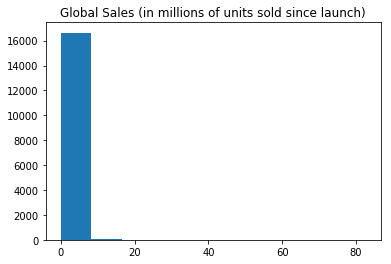

In [7]:
plt.hist(games.Global_Sales) #similar distribution for all other sales variables
plt.title('Global Sales (in millions of units sold since launch)')
plt.show()

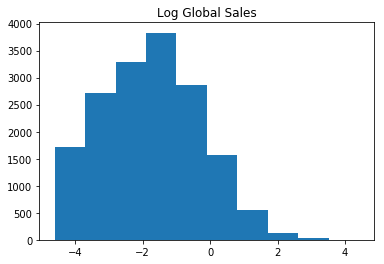

In [8]:
#create new log sales variable
Log_Global_Sales = np.log(games.Global_Sales)
games['Log_Global_Sales'] = Log_Global_Sales

plt.hist(games.Log_Global_Sales)
plt.title('Log Global Sales')
plt.show() #better distribution even though still skewed

When examining the data, global sales was clearly the variable of interest in creating predictive models. However as seen in the histogram below, the distribution was not normal and very right skewed. The majority of the data was grouped together while there were outliers that extended far beyond the median score. When we took the log of global sales, the distribution was not perfect but resembled a normal distribution.

2.Unusual features or outliers present in the data.

In [9]:
games[games.Name.isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global_Sales
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN,0.871293
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,-3.506558


In [10]:
#since only 2 observations, willing to look up actual info, found on VGChartz
games.loc[659,"Name"] = 'Mortal Kombat'
games.loc[14246,"Name"] = 'Mortal Kombat II'
games.loc[[659,14246],"Genre"] = 'Fighting'

In [11]:
games.loc[[659,14246]]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global_Sales
659,Mortal Kombat,GEN,1993.0,Fighting,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN,0.871293
14246,Mortal Kombat II,GEN,1993.0,Fighting,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN,-3.506558


When we examine the data, we find that we have two rows where the game names are null and that the genre is null. Since there were only two instances of this, it was easily found online.

In [12]:
games[games["Year_of_Release"] == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global_Sales
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E,-1.237874


In [13]:
games.loc[5936,"Year_of_Release"] = 2009
games.loc[5936,:]

Name                Imagine: Makeup Artist
Platform                                DS
Year_of_Release                       2009
Genre                           Simulation
Publisher                          Ubisoft
NA_Sales                              0.27
EU_Sales                                 0
JP_Sales                                 0
Other_Sales                           0.02
Global_Sales                          0.29
Critic_Score                           NaN
Critic_Count                           NaN
User_Score                             tbd
User_Count                             NaN
Developer                          Ubisoft
Rating                                   E
Log_Global_Sales                  -1.23787
Name: 5936, dtype: object

We found that one game had a year release of 2020 which was obviously incorrect. This was easily corrected by finding the information online.

In [14]:
games.User_Score[games.User_Score == 'tbd'].count()

2425

In [15]:
games.User_Score = games.User_Score.replace('tbd', np.nan)
games.User_Score = games.User_Score.astype(float)

Many of the entires for user score were labelled as 'tbd.' This would create an issue in making models, so we changed all the values to NaN and changing the variable type to float.

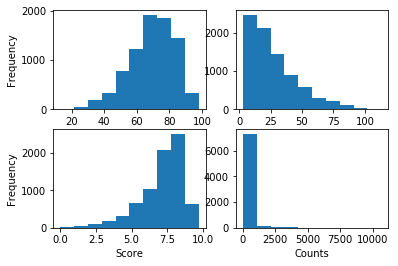

In [16]:
plt.subplot(2,2,1)
plt.hist(games.Critic_Score[~np.isnan(games.Critic_Score)])
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.subplot(2,2,2)
plt.hist(games.Critic_Count[~np.isnan(games.Critic_Count)])
plt.xlabel('Counts')
plt.subplot(2,2,3)
plt.hist(games.User_Score[~np.isnan(games.User_Score)])
plt.ylabel('Frequency')
plt.xlabel('Score')
plt.subplot(2,2,4)
plt.hist(games.User_Count[~np.isnan(games.User_Count)])
plt.xlabel('Counts')
plt.show()

We see here the distribution of critic scores and counts and user scores and counts. These are variables we will look more into as predictors for a model.

In [17]:
games['Decade'] = pd.cut(games['Year_of_Release'], [1980,1990,2000,2010,2020], right=False)
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Log_Global_Sales,Decade
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,4.413162,"[2000, 2010)"
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,3.694862,"[1980, 1990)"
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,3.570096,"[2000, 2010)"
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,3.489513,"[2000, 2010)"
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,3.445852,"[1990, 2000)"


In [18]:
print(games.groupby(['Decade'])["Global_Sales"].describe())
print(games.groupby(['Decade'])["Log_Global_Sales"].describe())

               count      mean       std   min   25%   50%   75%    max
Decade                                                                 
[1980, 1990)   205.0  1.836976  4.365494  0.02  0.40  0.85  1.56  40.24
[1990, 2000)  1771.0  0.723495  1.619275  0.01  0.10  0.27  0.69  31.37
[2000, 2010)  9194.0  0.502313  1.579266  0.01  0.06  0.17  0.45  82.53
[2010, 2020)  5280.0  0.482042  1.235503  0.01  0.04  0.13  0.40  21.81
               count      mean       std       min       25%       50%  \
Decade                                                                   
[1980, 1990)   205.0 -0.177854  1.142126 -3.912023 -0.916291 -0.162519   
[1990, 2000)  1771.0 -1.299384  1.364989 -4.605170 -2.302585 -1.309333   
[2000, 2010)  9194.0 -1.757085  1.419602 -4.605170 -2.813411 -1.771957   
[2010, 2020)  5280.0 -1.953684  1.516436 -4.605170 -3.218876 -2.040221   

                   75%       max  
Decade                            
[1980, 1990)  0.444686  3.694862  
[1990, 2000) -0.37

We were interested in seeing if the different decades games were released had any affect on what the games sales were. When looking at the summary tables, the first thing we can see is that the number of games recorded increased heavily per decade. The exception to this however is the current decade because it has not finished its entire ten years. It appears that as time goes on, the variance of game sales decreases due to the larger number of games being released. The large number of games however decreases the sales of games on average.

Exploratory Analysis - 3.Potential relationships that may exist in the data, including, but not limited to:

### Which Developers make the most games? Which Developers are the best?

                 Developer
Ubisoft                204
EA Sports              172
EA Canada              167
Konami                 162
Capcom                 139
EA Tiburon             108
Electronic Arts        104
Others                9040


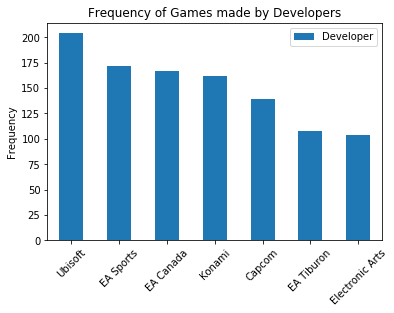

In [19]:
"""This will get the top N most frequent results from the column specified. If True, the Others parameter will also add a Others category
to merge up all the smaller values together."""

def get_top_n_frequency(df, n, col_name, others = True):
    df_count = df[col_name].value_counts()
    topN = pd.DataFrame(df_count[:n])
    if not others:
        return topN
    others = pd.Series({"Others" : df_count[n:].sum()}, name = col_name)
    others_df = pd.DataFrame(others)
    return topN.append(others_df)


top_devs_with_others = get_top_n_frequency(games, 7, "Developer", others=True)
print(top_devs_with_others)
top_devs_without_others = get_top_n_frequency(games, 7, "Developer", others=False)

top_devs_without_others.plot(kind = "bar")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("Frequency of Games made by Developers")
plt.show()

In [20]:
games[games.Critic_Count > 25].groupby("Developer")["Critic_Score"].mean().sort_values(ascending=False).head(7)

Developer
DMA Design                              97.000000
Irrational Games, 2K Marin              96.000000
Aspect                                  94.000000
Digital Extremes, 2K Marin              94.000000
Bungie Software                         93.666667
Kojima Productions, Moby Dick Studio    93.000000
EA Sports Big                           93.000000
Name: Critic_Score, dtype: float64

In [21]:
games[games.User_Count > 150].groupby("Developer")["Critic_Score"].mean().sort_values(ascending=False).head(7)

Developer
DMA Design                    97.000000
Rockstar North                96.090909
Bungie Software               96.000000
Irrational Games, 2K Marin    96.000000
Rockstar San Diego            95.000000
SCE/WWS, Media Molecule       95.000000
Aspect                        94.000000
Name: Critic_Score, dtype: float64

The barchart above shows that Ubisoft has made the most games by a margin of about 30. However, we see that EA, or Electronic Arts has many different developing groups that rank near the top. As far as the best developers go, we see that DMA Design is at the top for both critics and users. Today, DMA Design is called Rockstar North, which users also have scored very high. They are well-known for creating the Grand Theft Auto series that has been very successful.

### Who are the biggest Publishers? Which Platform has the most games?

                              Publisher
Electronic Arts                    1356
Activision                          985
Namco Bandai Games                  939
Ubisoft                             933
Konami Digital Entertainment        834
THQ                                 715
Nintendo                            706
Others                            10197


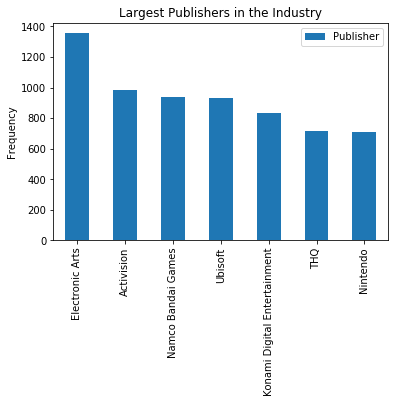

In [22]:
top_pubs_with_others = get_top_n_frequency(games, 7, "Publisher", others=True)
print(top_pubs_with_others)
top_pubs_without_others = get_top_n_frequency(games, 7, "Publisher", others=False)

top_pubs_without_others.plot(kind = "bar")
plt.ylabel("Frequency")
plt.title("Largest Publishers in the Industry")
plt.show()

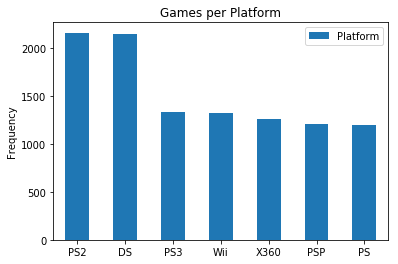

In [23]:
get_top_n_frequency(games, 7, "Platform", others=False).plot(kind="bar")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.title("Games per Platform")
plt.show()

The above table and barchart show that Electronic Arts has made more games than any other publisher by a considerable margin. This was hinted from our previous question where there were many EA developers

### What is the effect of User Scores&Ratings, Critic Scores&Ratings on global sales?

In [24]:
# correlation between some variables
print(games[['User_Score','Critic_Score','User_Count', 'Critic_Count', 'Log_Global_Sales']].corr())

                  User_Score  Critic_Score  User_Count  Critic_Count  \
User_Score          1.000000      0.580878    0.027044      0.194133   
Critic_Score        0.580878      1.000000    0.264376      0.425504   
User_Count          0.027044      0.264376    1.000000      0.362334   
Critic_Count        0.194133      0.425504    0.362334      1.000000   
Log_Global_Sales    0.153307      0.380064    0.237912      0.447775   

                  Log_Global_Sales  
User_Score                0.153307  
Critic_Score              0.380064  
User_Count                0.237912  
Critic_Count              0.447775  
Log_Global_Sales          1.000000  


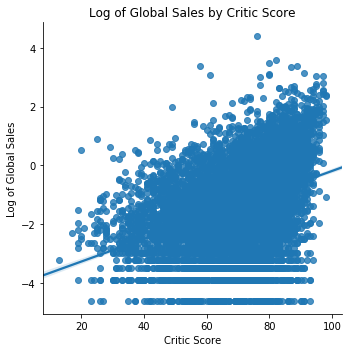

In [25]:
g = sns.lmplot(x="Critic_Score", y="Log_Global_Sales", data=games)
g.set_ylabels("Log of Global Sales")
g.set_xlabels("Critic Score")
plt.title("Log of Global Sales by Critic Score")
plt.tight_layout()
plt.show()

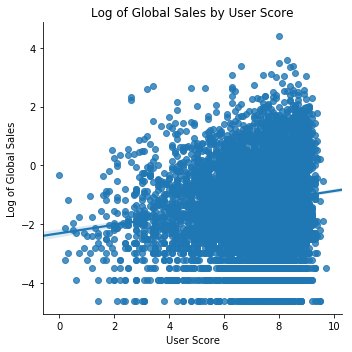

In [26]:
g = sns.lmplot(x="User_Score", y="Log_Global_Sales", data=games)
g.set_ylabels("Log of Global Sales")
g.set_xlabels("User Score")
plt.title("Log of Global Sales by User Score")
plt.tight_layout()
plt.show()

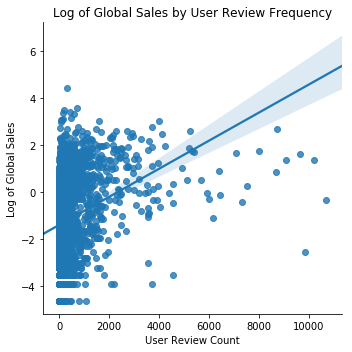

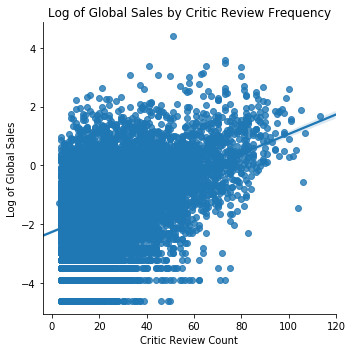

In [27]:
g = sns.lmplot(x="User_Count", y="Log_Global_Sales", data=games)
g.set_ylabels("Log of Global Sales")
g.set_xlabels("User Review Count")
plt.title("Log of Global Sales by User Review Frequency")
plt.tight_layout()
g = sns.lmplot(x="Critic_Count", y="Log_Global_Sales", data=games)
g.set_ylabels("Log of Global Sales")
g.set_xlabels("Critic Review Count")
plt.title("Log of Global Sales by Critic Review Frequency")
plt.tight_layout()
plt.show()

The above correlation matrix shows that critic scores & reviews, user scores & reviews, and global log sales are all positively correlated with each other, although not very strong. The scatterplots with regression lines above show this positive correlation. We will explore this more in the data modeling section.

### What are the global sales based on various categorical variables?

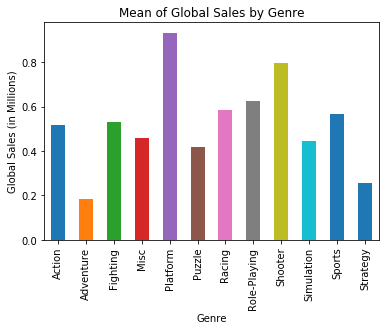

In [28]:
# making some plots
genre = games.groupby(['Genre'])["Global_Sales"].mean()
genre.plot(kind='bar')
plt.ylabel("Global Sales (in Millions)")
plt.title("Mean of Global Sales by Genre")
plt.show()

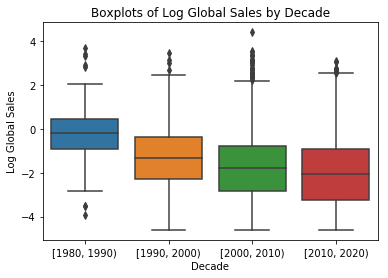

In [29]:
g = sns.boxplot(x='Decade',  y='Log_Global_Sales', data=games)
g.set_title("Boxplots of Log Global Sales by Decade")
g.set_ylabel("Log Global Sales")
plt.show()

Looking at plots of sales based on various categorical variables, we see that platforming and shooting games tend to have the most sales. From the second plot, we see that the oldest decade of games (1980 to 1990) have the largest average sales. This makes sense because the sales is based on how many copies of the game have been sold, in millions, since their launch, and so these games have been able to accumulate more sales over time compared to the recent games.

### What are the Ratings of various video games Genres? How do sales differ for the different combinations?

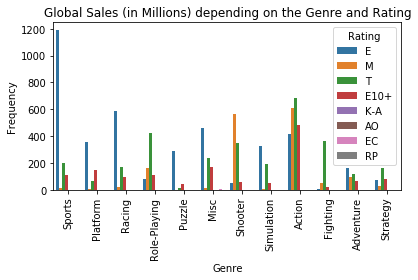

In [30]:
g = sns.countplot(x="Genre",hue = 'Rating', data=games)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Global Sales (in Millions) depending on the Genre and Rating")
g.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

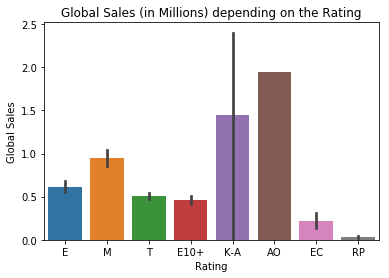

In [31]:
g = sns.barplot(y = "Global_Sales", x = "Rating", data = games)
g.set_title("Global Sales (in Millions) depending on the Rating")
g.set_ylabel("Global Sales")
plt.show()

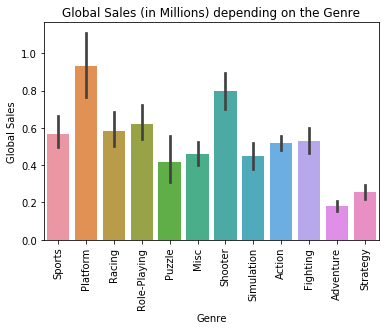

In [32]:
g = sns.barplot(y = "Global_Sales", x = "Genre", data = games)
for item in g.get_xticklabels():
    item.set_rotation(90)
g.set_title("Global Sales (in Millions) depending on the Genre")
g.set_ylabel("Global Sales")
plt.show()

In [33]:
games.pivot_table(index = 'Genre', columns = 'Rating', values = 'Global_Sales', aggfunc = 'count')

Rating,AO,E,E10+,EC,K-A,M,RP,T
Genre,,,,,,,,
Action,1.0,416.0,481.0,1.0,NaN,608.0,NaN,681.0
Adventure,NaN,162.0,68.0,2.0,NaN,99.0,NaN,115.0
Fighting,NaN,8.0,19.0,NaN,NaN,49.0,NaN,362.0
Misc,NaN,457.0,167.0,5.0,1.0,13.0,NaN,239.0
Platform,NaN,358.0,144.0,NaN,NaN,3.0,NaN,64.0
Puzzle,NaN,289.0,43.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,585.0,96.0,NaN,NaN,18.0,1.0,172.0
Role-Playing,NaN,84.0,111.0,NaN,NaN,162.0,NaN,420.0
Shooter,NaN,48.0,58.0,NaN,NaN,565.0,NaN,348.0


The first plot shows that games that fall under sports, racing, platforming, and puzzle are mostly rated E in comparison to shooting, fighting, and action games that are usually rated T and up. Even so, these ratings and genres do not seem to strongly differ on sales since we see that AO (Adults Only) rated games yield the largest sales among ratings while games of platforming yield the largest sales among genre.

# 3. Data modeling

The question we want to explore: What is the effect of User Scores&Ratings, Critic Scores&Ratings on global sales?

In [34]:
model = smf.ols('Log_Global_Sales ~ User_Score + User_Count + Critic_Score', data = games)

In [35]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Log_Global_Sales   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     424.8
Date:                Fri, 08 Jun 2018   Prob (F-statistic):          1.46e-253
Time:                        15:04:57   Log-Likelihood:                -11752.
No. Observations:                7017   AIC:                         2.351e+04
Df Residuals:                    7013   BIC:                         2.354e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.4706      0.089    -38.963   

In [36]:
#Adding Critic_Count and it increased R^2 by 0.08
model2 = smf.ols('Log_Global_Sales ~ User_Score + User_Count + Critic_Score + Critic_Count', data = games)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:       Log_Global_Sales   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     523.0
Date:                Fri, 08 Jun 2018   Prob (F-statistic):               0.00
Time:                        15:04:57   Log-Likelihood:                -11422.
No. Observations:                7017   AIC:                         2.285e+04
Df Residuals:                    7012   BIC:                         2.289e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.3795      0.085    -39.732   

Our predicted variable is log of global sales, so in order to interpret the coefficients we need to take e to the power of each coefficient.

In [37]:
print(math.exp(-3.3795)) # intercept
print(math.exp(-.0434)) # user score
print(math.exp(.0002)) # user count
print(math.exp(.025)) # critic score
print(math.exp(.023)) # critic count

0.03406448271860789
0.9575283021336983
1.0002000200013335
1.0253151205244289
1.0232665395472176


## Interpreting the coefficients

The intercept is just the group mean, so the average game sells .034 million copies.

Holding everything else constant if the user score increases by 1, on average we expect to sell .957 million more copies.

Holding everything else constant if the user count increases by 1, on average we expect to sell 1.0002 million more copies.

Holding everything else constant if the critic score increases by 1, on average we expect to sell 1.025 million more copies.

Holding everything else constant if the critic count increases by 1, on average we expect to sell 1.023 million more copies.